**Brian Blaylock**  
**June 28, 2019**

# Figure 6: GLM flashes at 0000 TC

![](./figs/Fig-8_West_F02-F12-Flashes_20180823-0000.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_cmap.reflectivity_cmap import reflect_ncdc

from BB_HRRR.HRRR_paths import get_domains

from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

from fires_list import get_fire

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 7]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
#mpl.rcParams['figure.subplot.wspace'] = 0.03
#mpl.rcParams['figure.subplot.hspace'] = 0.00
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

Create HRRR map.
loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_c_2000.npy map from file
Forecasts [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Generate domains and masks.
HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234
dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Texas', 'Florida'])


In [2]:
def get_GLM_flashes(DATE, GOES=16, verbose=False):
    # GLM Files for the hour
    GLM_files = get_GOES_nearesttime(DATE-timedelta(minutes=30),
                                     product='GLM', satellite=GOES, window=30, verbose=verbose)

    # GLM flash data from those files
    GLM_flash = accumulate_GLM_FAST(GLM_files, data_type='flash', verbose=verbose)

    # Boolean for flashes inside HRRR domain
    GLM_in_HRRR = filter_by_HRRR(GLM_flash['latitude'], GLM_flash['longitude'], lat, lon, mHRRR) 

    # Rewrite lightning flashes for only in HRRR domian
    GLM_flash['longitude'] = GLM_flash['longitude'][GLM_in_HRRR]
    GLM_flash['latitude'] = GLM_flash['latitude'][GLM_in_HRRR]
    return GLM_flash

In [3]:
# Load some things I need...
domains = get_domains()
c = reflect_ncdc()
lat, lon = get_hrrr_latlon(DICT=False)
mHRRR = draw_HRRR_map()
xpixels = 1000
lw = .8  # linewidth used for state boundaries
events = ['Mallard', 'Lake Christine', 'July Storm']

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [7]:
DATE = datetime(2018, 8, 23, 0)
flashes = get_GLM_flashes(DATE)

Requested 2018-08-22 23:30:00	satellite: GOES-16	Product: GLM
-->> Accumulate GLM FAST MP: 50.0%

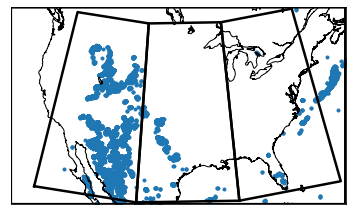

In [8]:
c = [.25]*3
for i, d in domains.items():
    xx = d['path'].vertices[:,0]
    yy = d['path'].vertices[:,1]
    X, Y = mHRRR(xx,yy)
    mHRRR.plot(X,Y, linewidth=2.5, color='k', linestyle='-')

mHRRR.drawcoastlines()
mHRRR.scatter(flashes['longitude'], flashes['latitude'], latlon=True, marker='.')

In [9]:
m = draw_centermap((37,-112), resolution='l', size=[15,10])

In [10]:
from mpl_toolkits.basemap import Basemap

In [11]:
mWest = Basemap(llcrnrlat=np.min(domains['West']['lat']), llcrnrlon=np.min(domains['West']['lon']),
            urcrnrlat=np.max(domains['West']['lat']), urcrnrlon=np.max(domains['West']['lon']),
            resolution='h', area_thresh=10000)

In [12]:

binary = get_GLM_HRRR_contingency_stats(DATE)

>>> get_GLM_HRRR_contingency_stats: 2018-08-23 00:00:00
>>Load binary stats from file /uufs/chpc.utah.edu/common/home/horel-group8/blaylock/GLM-HRRR_LTNG_binary//HRRR-GLM-Binary_2018-08-23_0000.npy


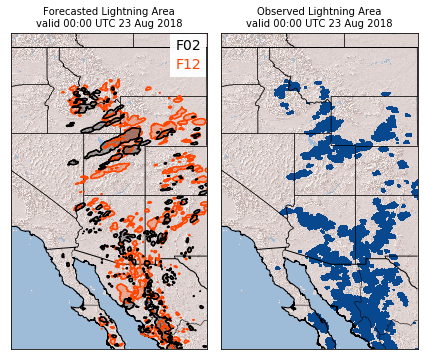

In [68]:
fig, axes = plt.subplots(1,2, figsize=[6,6])

# Left Figure: Forecasted Lightning
plt.sca(axes[0])
mWest.drawstates(); mWest.drawcoastlines(linewidth=1); mWest.drawcountries(linewidth=1)
mWest.arcgisimage(service='World_Shaded_Relief', xpixels=1000)

bbox = {'facecolor':'white',
        'alpha':0.95,
        'pad':5,
        'edgecolor':'none'}
for fxx, style, color, offset in zip([2, 12], ['-', '-'], ['k', 'orangered'], [.98, .92]):
    mWest.contour(lon, lat, binary['Forecast Binary'][fxx-1],
              levels=1, colors=color, linestyles=style, zorder=np.abs(fxx-17)+100)
    mWest.contourf(lon, lat, np.array(binary['Forecast Binary'][fxx-1], dtype=int),
                   levels=np.arange(.8,1.2,.2), colors=[color], alpha=.3, zorder=np.abs(fxx-17)+50)
    plt.gca().text(.97,offset, 'F%02d' % fxx, bbox=bbox, va='top', ha='right',
                     fontsize=14, color=color,
                     transform=plt.gca().transAxes, zorder=1000)
plt.title('Forecasted Lightning Area\nvalid %s' % DATE.strftime('%H:%M UTC %d %b %Y'))

   

    
# Right Figure: Observed Lightning
plt.sca(axes[1])
mWest.drawstates(); mWest.drawcoastlines(linewidth=1); mWest.drawcountries(linewidth=1)
mWest.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
GLM_binary = np.ma.array(binary['Observed Binary'], mask=binary['Observed Binary']==0, dtype=int)
mWest.pcolormesh(lon, lat, GLM_binary, zorder=1,
                 cmap='Blues', vmax=1.1, vmin=0)

plt.title('Observed Lightning Area\nvalid %s' % DATE.strftime('%H:%M UTC %d %b %Y'))

fig.tight_layout()
plt.savefig('./figs/Fig-8_West_F02-F12-Flashes_%s' % DATE.strftime('%Y%m%d-%H%M'))